## Симуляція епідемії

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
# Параметри моделі
N = 10000  # Кількість вузлів
m = 3  # Кількість зв'язків для нового вузла
infection_probability = 0.3  # Базова ймовірність зараження
recovery_days = 30  # Час одужання
simulation_days = 150  # Тривалість симуляції
initial_infected = 10  # Початкова кількість інфікованих вузлів
lockdown_factor = 0.2  # Фактор зменшення ваги зв'язків під час локдауну
vaccination_percentage = 0.3  # Відсоток вакцинованих
immunity_loss_rate = 0.005  # Ймовірність втрати імунітету щодня
incubation_period = 5  # Інкубаційний період у днях
death_probability = 0.01  # Ймовірність смерті для інфікованих

In [3]:
# Стани вузлів
SUSCEPTIBLE = "susceptible"
INFECTED = "infected"
RECOVERED = "recovered"
VACCINATED = "vaccinated"
DEAD = "dead"

In [4]:
# Створення графа
def create_scale_free_graph(N, m):
    G = nx.barabasi_albert_graph(N, m)
    for u, v in G.edges():
        G.edges[u, v]['weight'] = random.uniform(0.5, 2.0)  # Ваги зв'язків
    for node in G.nodes():
        G.nodes[node]['state'] = SUSCEPTIBLE
        G.nodes[node]['days_infected'] = 0
        G.nodes[node]['days_incubating'] = 0
        G.nodes[node]['immunity_level'] = random.uniform(0, 1)  # Початковий імунітет
    return G

Аналіз початкової моделі...


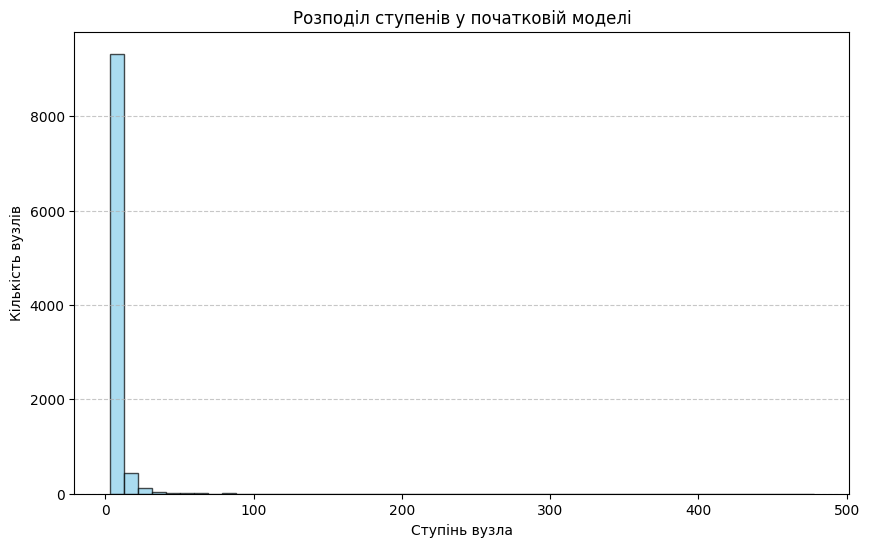

Середній ступінь: 6.00
Максимальний ступінь: 478
Мінімальний ступінь: 3


In [5]:
# Візуалізація характеристик графа
def visualize_graph_properties(G, title="Розподіл ступенів вузлів"):
    degrees = [degree for _, degree in G.degree()]
    
    # Розподіл ступенів
    plt.figure(figsize=(10, 6))
    plt.hist(degrees, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel("Ступінь вузла")
    plt.ylabel("Кількість вузлів")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Основні характеристики
    average_degree = np.mean(degrees)
    max_degree = np.max(degrees)
    min_degree = np.min(degrees)

    print(f"Середній ступінь: {average_degree:.2f}")
    print(f"Максимальний ступінь: {max_degree}")
    print(f"Мінімальний ступінь: {min_degree}")

print("Аналіз початкової моделі...")
G_initial = create_scale_free_graph(N, m)
visualize_graph_properties(G_initial, "Розподіл ступенів у початковій моделі")

In [6]:
# Початкова інфекція
def initialize_infection(G, num_infected):
    initial_infected_nodes = random.sample(list(G.nodes()), num_infected)
    for node in initial_infected_nodes:
        G.nodes[node]['state'] = INFECTED

In [7]:
# Симуляція поширення хвороби 
def spread_infection(G):
    new_infections = 0
    new_deaths = 0

    for node in list(G.nodes()):
        if G.nodes[node]['state'] == INFECTED:
            if G.nodes[node]['days_incubating'] < incubation_period:
                G.nodes[node]['days_incubating'] += 1
                continue

            for neighbor in G.neighbors(node):
                if G.nodes[neighbor]['state'] == SUSCEPTIBLE:
                    # Ймовірність зараження залежить від рівня імунітету
                    immunity_factor = 1 - G.nodes[neighbor]['immunity_level']
                    if random.random() < infection_probability * G.edges[node, neighbor]['weight'] * immunity_factor:
                        G.nodes[neighbor]['state'] = INFECTED
                        G.nodes[neighbor]['days_incubating'] = 0
                        new_infections += 1

            G.nodes[node]['days_infected'] += 1
            # Перевірка на смерть
            if random.random() < death_probability:
                G.nodes[node]['state'] = DEAD
                new_deaths += 1
            elif G.nodes[node]['days_infected'] >= recovery_days:
                G.nodes[node]['state'] = RECOVERED
                G.nodes[node]['immunity_level'] = random.uniform(0.5, 0.8)  # Відновлення дає частковий імунітет

        if G.nodes[node]['state'] == RECOVERED:
            if random.random() < immunity_loss_rate:
                G.nodes[node]['state'] = SUSCEPTIBLE
                G.nodes[node]['immunity_level'] = random.uniform(0, 0.3)  # Втрата імунітету

    return new_infections, new_deaths

In [8]:
# Основна симуляція 
def simulate_epidemic(G, days):
    daily_infected = []
    cumulative_infected = []
    cumulative_deaths = []
    total_infected = 0
    total_deaths = 0

    for day in range(days):
        new_infections, new_deaths = spread_infection(G)
        daily_infected.append(new_infections)
        total_infected += new_infections
        cumulative_infected.append(total_infected)

        total_deaths += new_deaths
        cumulative_deaths.append(total_deaths)

        print(f"День {day + 1}: {new_infections} нових інфікованих")

    return daily_infected, cumulative_infected, cumulative_deaths

Симуляція базового сценарію...
День 1: 0 нових інфікованих
День 2: 0 нових інфікованих
День 3: 0 нових інфікованих
День 4: 0 нових інфікованих
День 5: 0 нових інфікованих
День 6: 19 нових інфікованих
День 7: 11 нових інфікованих
День 8: 5 нових інфікованих
День 9: 3 нових інфікованих
День 10: 4 нових інфікованих
День 11: 8 нових інфікованих
День 12: 39 нових інфікованих
День 13: 65 нових інфікованих
День 14: 47 нових інфікованих
День 15: 41 нових інфікованих
День 16: 29 нових інфікованих
День 17: 86 нових інфікованих
День 18: 170 нових інфікованих
День 19: 192 нових інфікованих
День 20: 250 нових інфікованих
День 21: 246 нових інфікованих
День 22: 247 нових інфікованих
День 23: 378 нових інфікованих
День 24: 526 нових інфікованих
День 25: 607 нових інфікованих
День 26: 587 нових інфікованих
День 27: 607 нових інфікованих
День 28: 559 нових інфікованих
День 29: 687 нових інфікованих
День 30: 626 нових інфікованих
День 31: 513 нових інфікованих
День 32: 536 нових інфікованих
День 33: 445

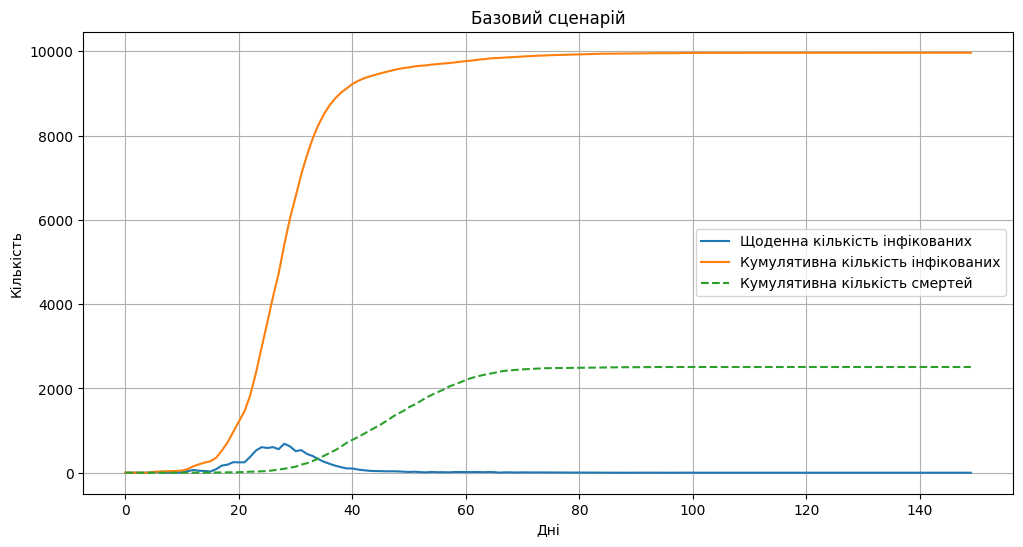

In [9]:
# Візуалізація 
def plot_epidemic(daily_infected, cumulative_infected, cumulative_deaths, title):
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(daily_infected)), daily_infected, label="Щоденна кількість інфікованих")
    plt.plot(range(len(cumulative_infected)), cumulative_infected, label="Кумулятивна кількість інфікованих")
    plt.plot(range(len(cumulative_deaths)), cumulative_deaths, label="Кумулятивна кількість смертей", linestyle="dashed")
    plt.xlabel("Дні")
    plt.ylabel("Кількість")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Основна програма
print("Симуляція базового сценарію...")
G = create_scale_free_graph(N, m)
initialize_infection(G, initial_infected)
daily_infected_base, cumulative_infected_base, cumulative_deaths_base = simulate_epidemic(G, simulation_days)
plot_epidemic(daily_infected_base, cumulative_infected_base, cumulative_deaths_base, "Базовий сценарій")

In [10]:
# Локдаун
def apply_lockdown(G, factor):
    for u, v in G.edges():
        G.edges[u, v]['weight'] *= factor

Симуляція сценарію локдауну...
День 1: 0 нових інфікованих
День 2: 0 нових інфікованих
День 3: 0 нових інфікованих
День 4: 0 нових інфікованих
День 5: 0 нових інфікованих
День 6: 1 нових інфікованих
День 7: 4 нових інфікованих
День 8: 3 нових інфікованих
День 9: 2 нових інфікованих
День 10: 1 нових інфікованих
День 11: 1 нових інфікованих
День 12: 2 нових інфікованих
День 13: 2 нових інфікованих
День 14: 3 нових інфікованих
День 15: 0 нових інфікованих
День 16: 3 нових інфікованих
День 17: 7 нових інфікованих
День 18: 3 нових інфікованих
День 19: 6 нових інфікованих
День 20: 5 нових інфікованих
День 21: 5 нових інфікованих
День 22: 14 нових інфікованих
День 23: 10 нових інфікованих
День 24: 5 нових інфікованих
День 25: 5 нових інфікованих
День 26: 5 нових інфікованих
День 27: 9 нових інфікованих
День 28: 20 нових інфікованих
День 29: 16 нових інфікованих
День 30: 24 нових інфікованих
День 31: 23 нових інфікованих
День 32: 26 нових інфікованих
День 33: 38 нових інфікованих
День 34: 53 н

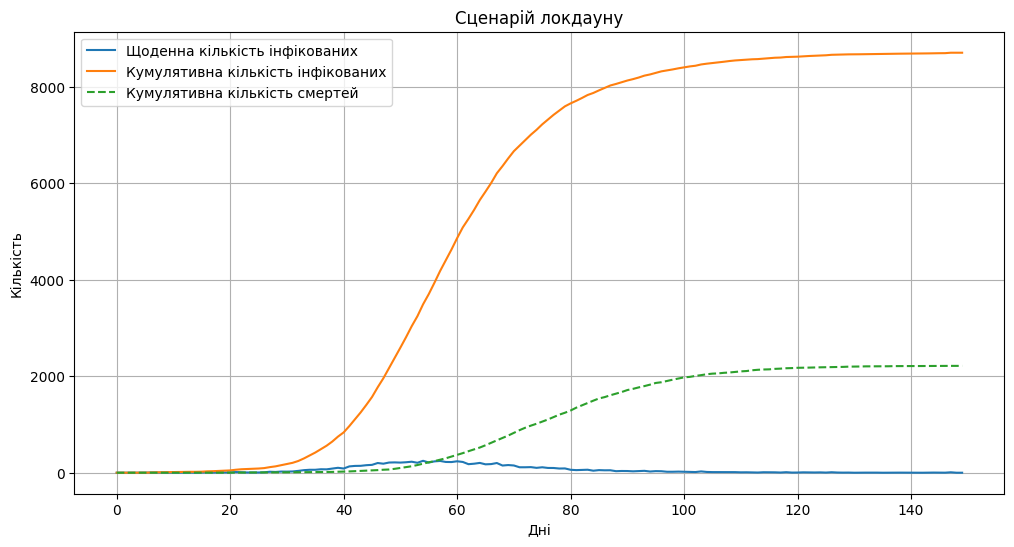

In [11]:
# Сценарій локдауну з урахуванням смертності
print("Симуляція сценарію локдауну...")
G = create_scale_free_graph(N, m)
initialize_infection(G, initial_infected)
apply_lockdown(G, lockdown_factor)
daily_infected_lockdown, cumulative_infected_lockdown, cumulative_deaths_lockdown = simulate_epidemic(G, simulation_days)
plot_epidemic(daily_infected_lockdown, cumulative_infected_lockdown, cumulative_deaths_lockdown, "Сценарій локдауну")

In [12]:
# Вакцинація
def vaccinate_nodes(G, percentage):
    num_vaccinated = int(len(G.nodes()) * percentage)
    vaccinated_nodes = random.sample(list(G.nodes()), num_vaccinated)
    for node in vaccinated_nodes:
        G.nodes[node]['state'] = VACCINATED
        G.nodes[node]['immunity_level'] = 1.0  # Вакцинація дає максимальний імунітет

Симуляція сценарію вакцинації...
День 1: 0 нових інфікованих
День 2: 0 нових інфікованих
День 3: 0 нових інфікованих
День 4: 0 нових інфікованих
День 5: 0 нових інфікованих
День 6: 5 нових інфікованих
День 7: 3 нових інфікованих
День 8: 1 нових інфікованих
День 9: 1 нових інфікованих
День 10: 4 нових інфікованих
День 11: 4 нових інфікованих
День 12: 18 нових інфікованих
День 13: 28 нових інфікованих
День 14: 26 нових інфікованих
День 15: 21 нових інфікованих
День 16: 18 нових інфікованих
День 17: 29 нових інфікованих
День 18: 76 нових інфікованих
День 19: 93 нових інфікованих
День 20: 78 нових інфікованих
День 21: 93 нових інфікованих
День 22: 117 нових інфікованих
День 23: 121 нових інфікованих
День 24: 230 нових інфікованих
День 25: 229 нових інфікованих
День 26: 226 нових інфікованих
День 27: 255 нових інфікованих
День 28: 289 нових інфікованих
День 29: 313 нових інфікованих
День 30: 375 нових інфікованих
День 31: 318 нових інфікованих
День 32: 336 нових інфікованих
День 33: 305 нов

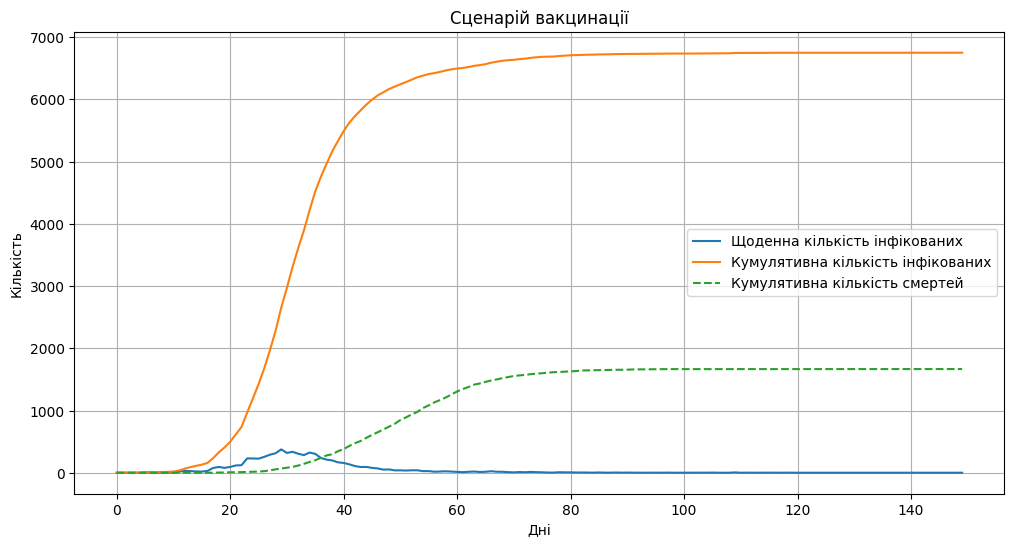

In [13]:
# Сценарій вакцинації 
print("Симуляція сценарію вакцинації...")
G = create_scale_free_graph(N, m)
initialize_infection(G, initial_infected)
vaccinate_nodes(G, vaccination_percentage)
daily_infected_vaccination, cumulative_infected_vaccination, cumulative_deaths_vaccination = simulate_epidemic(G, simulation_days)
plot_epidemic(daily_infected_vaccination, cumulative_infected_vaccination, cumulative_deaths_vaccination, "Сценарій вакцинації")